# Point in Polygon

source: https://en.wikipedia.org/wiki/Point_in_polygon

In [24]:
from matplotlib import pyplot as plt
import numpy as np;

In [66]:
# user input: number of vertices of the polygon
number_vertices = 4

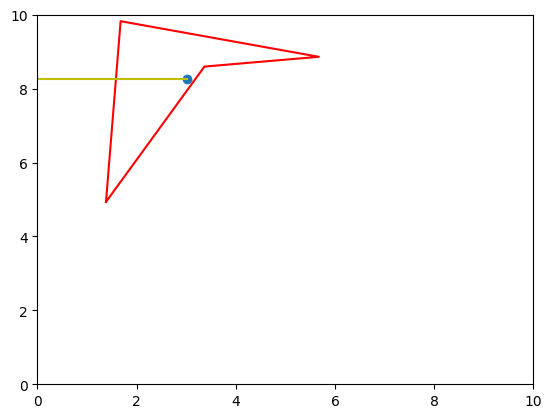

Is the point in the polygon? True


In [80]:
# Function to determine whether the point is right of the line
def is_point_right(point_start, point_end, point): # all parameters are a list of 2 elements
    
    # if start and end if line are vertically above each other, interpolation fails, second criterion is taken
    if (point_end[0]-point_start[0]) != 0: 
        
        # calculate y coordinate of point on line where x-coordinate is x-coordinate of point
        interpolation = point_start[1] + (point_end[1]-point_start[1])/(point_end[0]-point_start[0])*(point[0]-point_start[0])
        
        # initialization
        is_right = False
        
        # check position of start and end point --> relevant for criterion
        start_x_smaller_end_x = ((point_end[0]-point_start[0]) >= 0)
        start_y_smaller_end_y = ((point_end[1]-point_start[1]) >= 0)
        # only_one == true --> line goes from top left to bottom right or bottom right to top left
        only_one = start_x_smaller_end_x ^ start_y_smaller_end_y

        # criterion if point is right or left of line
        if only_one:
            is_right = interpolation < point[1]
        else:
            is_right = interpolation > point[1]

    # start and end point are directly above each other (same x-coordinate)        
    else:
        is_right = point[0]>point_start[0]

    # return result
    return is_right

    
# function to create a random point, returns a list of two elements
def create_point():
    x = np.random.uniform(0,10)
    y = np.random.uniform(0,10)
    return [x,y]

# function to create a polygon of random points with the number of vertices as a parameter
def create_polygon(number_vertices):
    poly = [create_point() for _ in range(number_vertices)]
    # make sure polygon gets closed
    poly.append(poly[0])
    return poly

# function to visualize the polygon and the point
def visualize(poly, P):
    # create plot window
    fig, ax = plt.subplots(1)
    # Plot polygon and point
    x_coord_poly = [point[0] for point in poly]
    y_coord_poly = [point[1] for point in poly]
    plt.plot(x_coord_poly, y_coord_poly, 'r')
    ax.scatter(P[0], P[1])
    # horizontal line through point for visualization
    ax.plot([0, P[0]], [P[1], P[1]], 'y')
    # zoom and show the plot
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.show()



# check if the point is in the polygon
def point_in_polygon(poly, P):
    # create list of line elements of polygon
    line_elements = [[poly[i], poly[i+1]] for i in range(len(poly)-1)]
    # take only those line elements that are by crossed by an infinite horizontal line through the point
    line_elements_nec = [el for el in line_elements if ((el[0][1]>=P[1]) ^ (el[1][1]>=P[1]))]
    # shorten the list, such that the length correspoints to the number of line elements that are crossed
    line_elements_correct = [1 for el in line_elements_nec if is_point_right(el[0], el[1], P)]
    # check if number is even or odd
    point_in_polygon = len(line_elements_correct)%2==1
    print(f"Is the point in the polygon? {point_in_polygon}")





# main program
poly = create_polygon(number_vertices)
P = create_point()
visualize(poly,P)
point_in_polygon(poly, P)
